# Tokenizers (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

[![Video Title](https://img.youtube.com/vi/VFp38yj8h3A/0.jpg)](https://www.youtube.com/watch?v=VFp38yj8h3A)

We'll look at 3 tokenizer algo's

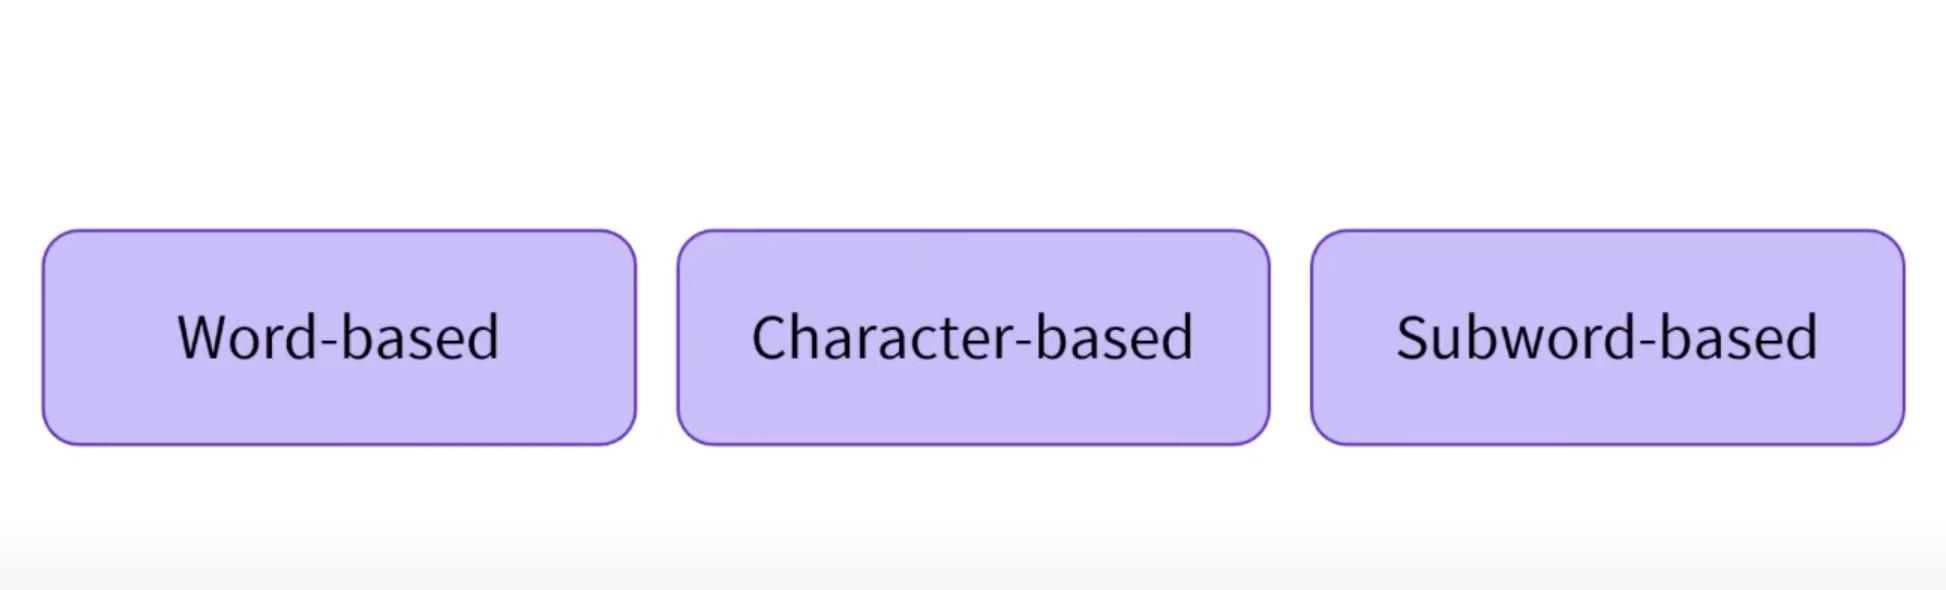

> ### Word-base tokenizers

[![Video Title](https://img.youtube.com/vi/nhJxYji1aho/0.jpg)](https://www.youtube.com/watch?v=nhJxYji1aho)

In [1]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


> ### Character-based tokenizers

[![Video Title](https://img.youtube.com/vi/ssLq_EK2jLE/0.jpg)](https://www.youtube.com/watch?v=ssLq_EK2jLE)

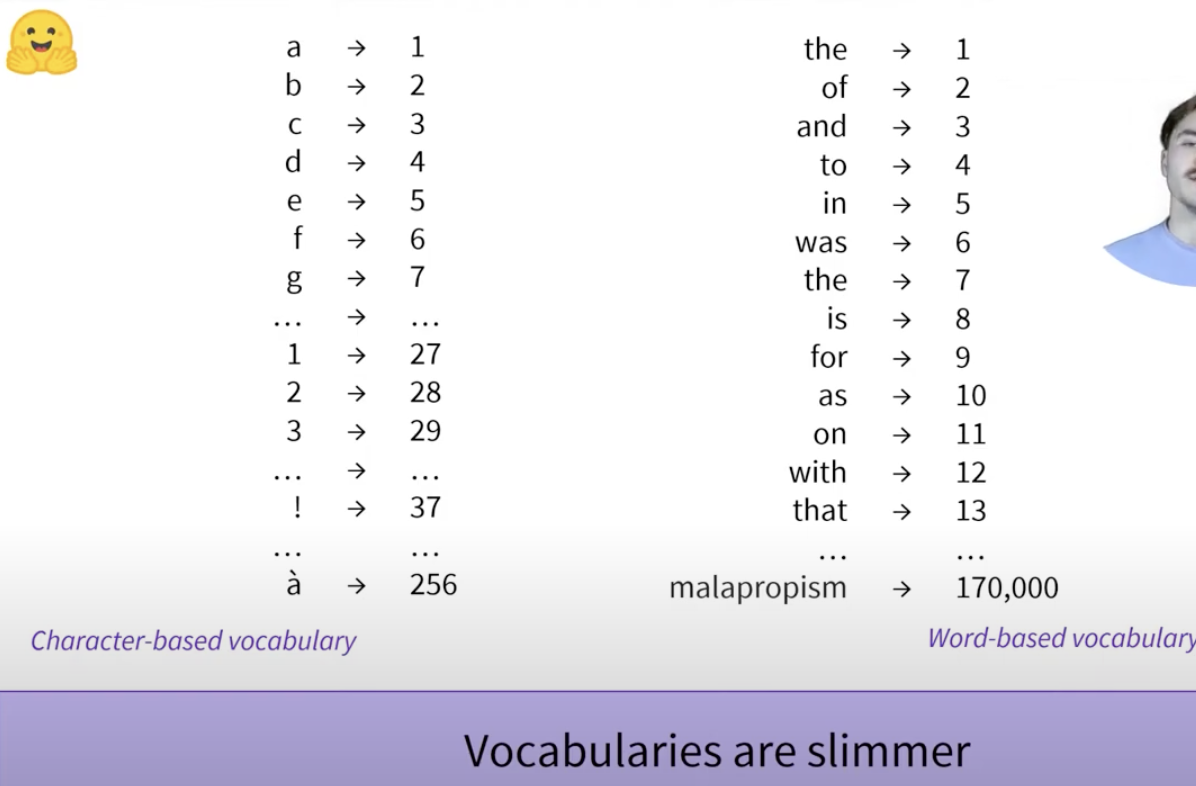

* character-based vocabs more complete than word-based
* characters do not hold as much semantic info as words
* tokens for character-based processed sequences much larger than word-based --> impacts size on *context* model can carry around (limited context-window)
* Not perfect but solves a lot of the word-based tokenizer issues --> consider for new problems

In [2]:
from transformers import BertTokenizer

# using specific tokenizer object
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vscode/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer

# auto-detect tokenizer object
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 11303, 1200, 2443, 1110, 3014, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [4]:
import os

if 'models' not in os.listdir():
    os.mkdir('models')

In [ ]:
tokenizer.save_pretrained("models")

In [2]:
from transformers import AutoModel, AutoTokenizer

# model = AutoModel.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


/home/vscode/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 11303, 1200, 2443, 1110, 3014]

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

'Using a Transformer network is simple'

> ### Sub-word tokenization

* Generlly used by models achieving best-in-class English performance!


[![Video Title](https://img.youtube.com/vi/zHvTiHr506c/0.jpg)](https://www.youtube.com/watch?v=zHvTiHr506c)

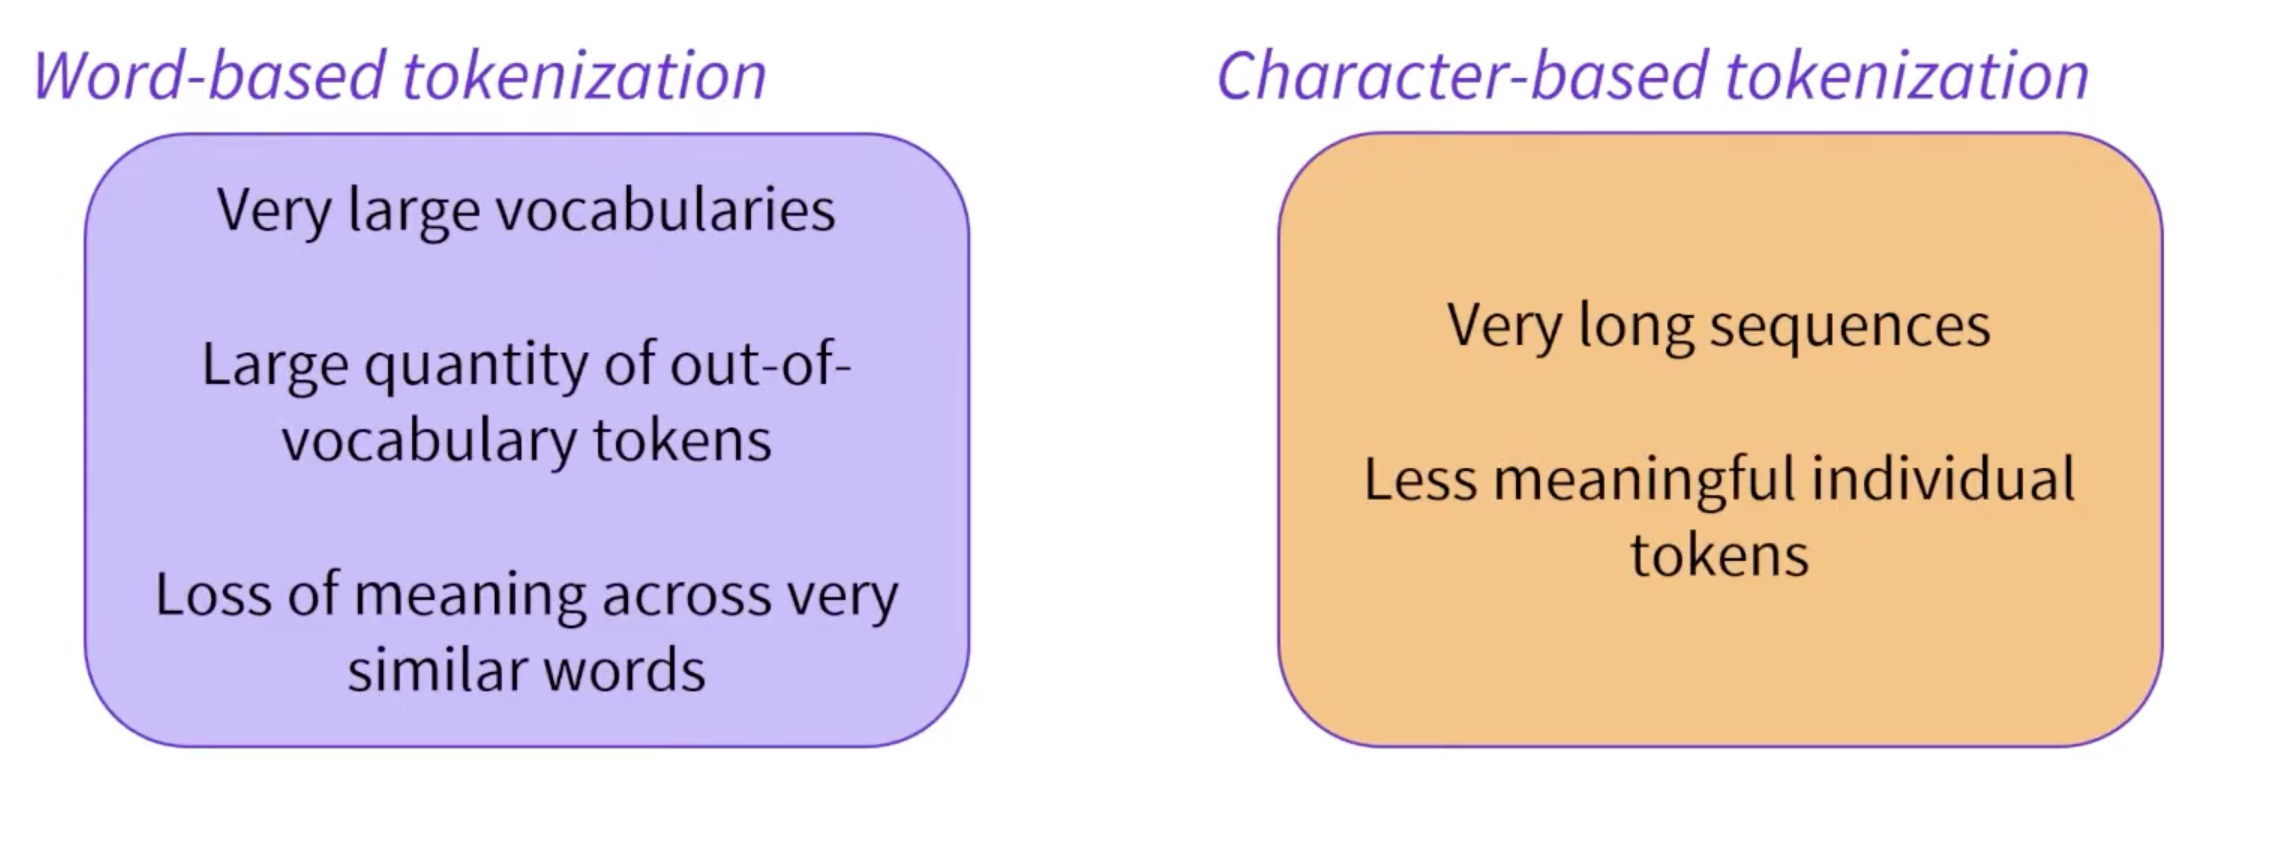

> ### Goal: is to find middle-ground

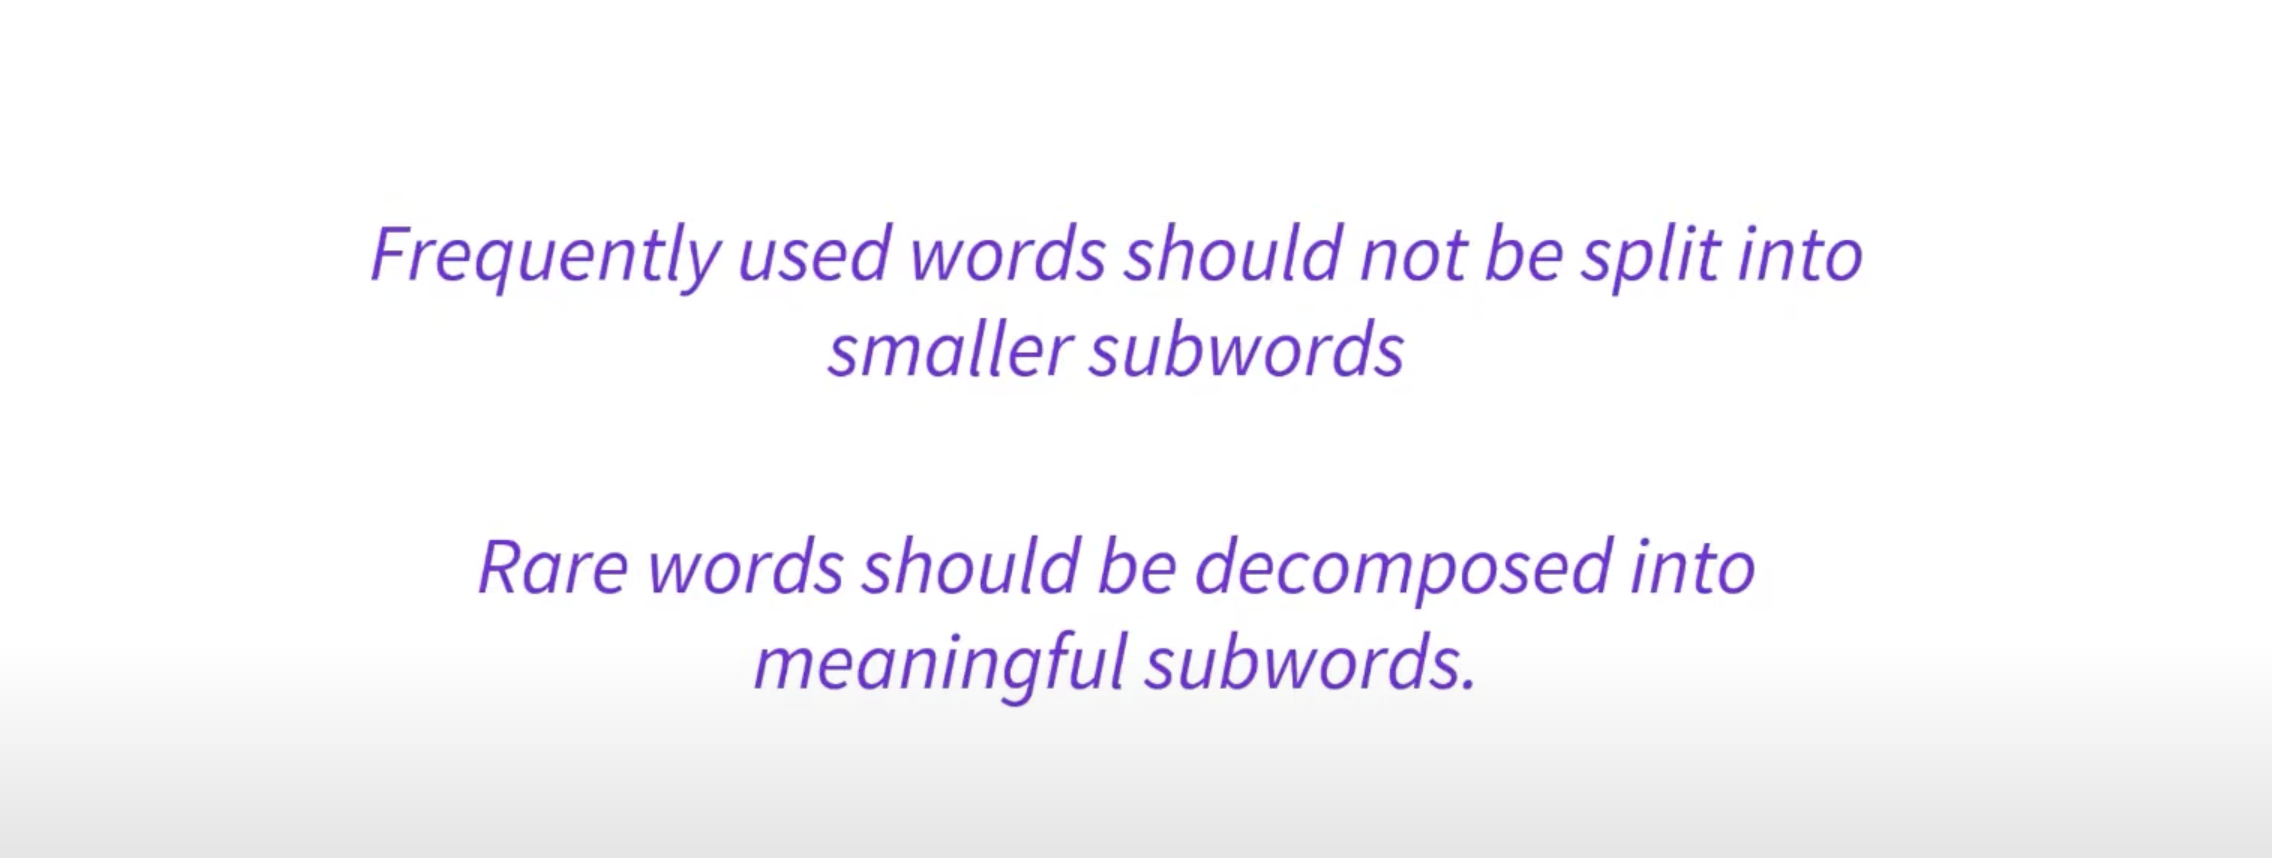

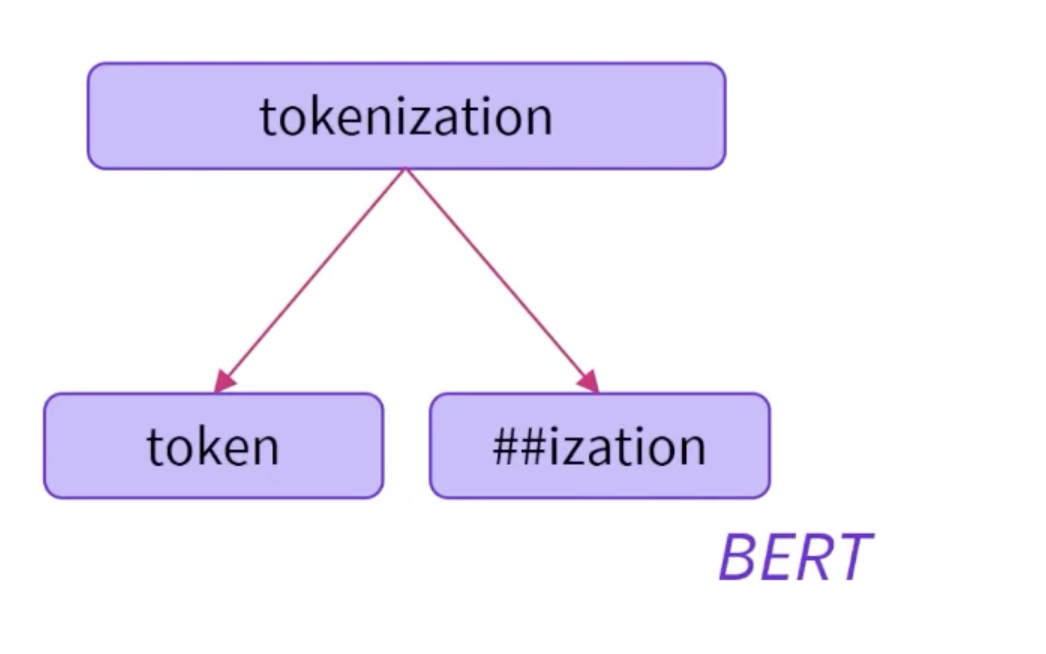

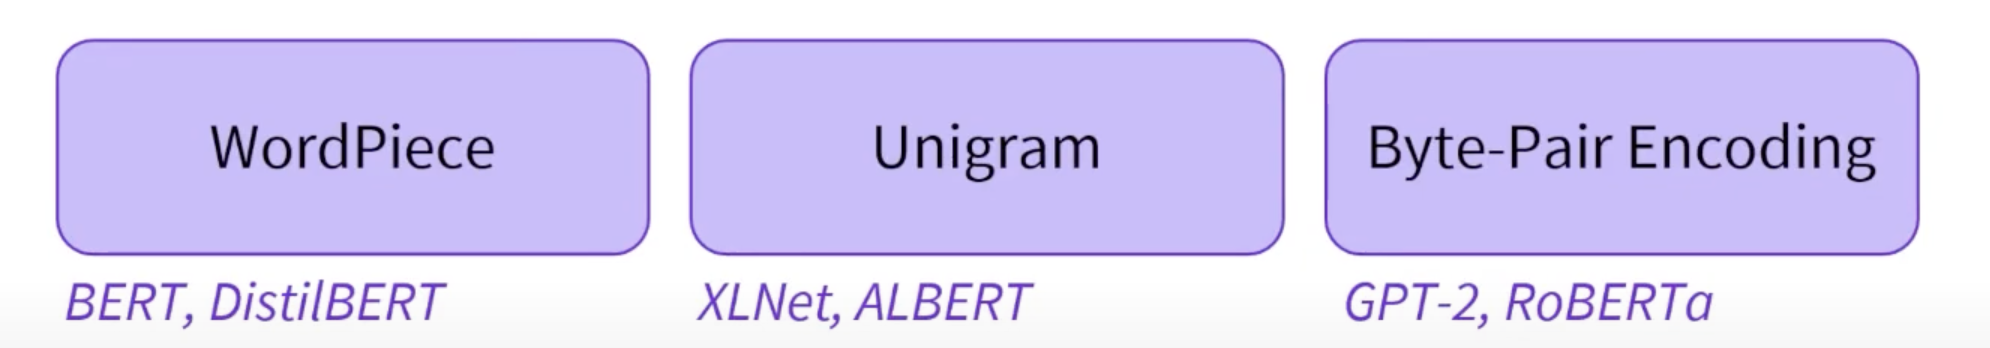

> ### Tokenization Pipeline

[![Video Title](https://img.youtube.com/vi/Yffk5aydLzg/0.jpg)](https://www.youtube.com/watch?v=Yffk5aydLzg)

# Encoding

> #### Tokenization: `sequence` to `token`

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


> #### From `tokens` to `Input_IDs`

In [6]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


# Decoding

Decoding is going the other way around: from vocabulary indices

In [7]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple
